# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: shubowan
*   Your **student number**: 1007826907



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

 Each time we update the weights is an iteration. Each time the model go through the whole dataset is one epoch.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

display(df)

X_train,X,y_train,y = train_test_split(df.iloc[:,:40],df['Goal'],test_size=0.3,random_state=1)
X_val,X_test,y_val,y_test = train_test_split(X,y,test_size=0.5,random_state=1)

X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)
X_test =StandardScaler().fit_transform(X_test)

def insert(data):
  column = np.array([1]*data.shape[0])
  data = np.insert(data,0,column,axis=1)
  return data

X_train = insert(X_train)
X_val = insert(X_val)
X_test = insert(X_test)

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [3]:
from scipy import linalg
from sklearn.metrics import mean_squared_error

inv_X = linalg.inv(np.dot(X_train.T,X_train))
theta = np.dot(inv_X,np.dot(X_train.T,y_train))

pre_train = np.dot(X_train,theta)
pre_val = np.dot(X_val,theta)

rmse_train = mean_squared_error(y_train,pre_train,squared=False)
rmse_val = mean_squared_error(y_val,pre_val,squared=False)
print('train data RMSE:',rmse_train)
print('validation data RMSE:',rmse_val)

train data RMSE: 0.00017707758079743764
validation data RMSE: 0.00017443831573583636


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

Training and validation rmse curves are very similar and converge well. So there is no overfitting or underfitting here.

--- Total Training Time: 14.170707702636719 (s) ---


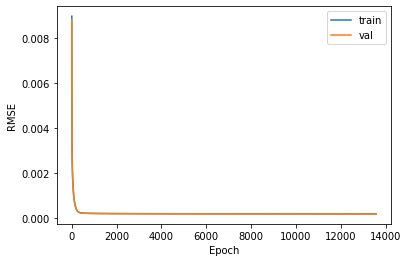

In [4]:
import time
import matplotlib.pyplot as plt
start_time = time.time() 

w = 0.001*np.random.random(41)
lr = 0.01
rmse_train_array = []
rmse_val_array = []
rmse_valGD = 1

while rmse_valGD > 1.001*rmse_val:
  pre_train = np.dot(X_train,w.T)
  pre_val = np.dot(X_val,w.T)
  rmse_trainGD = mean_squared_error(pre_train,y_train,squared=False)
  rmse_valGD = mean_squared_error(pre_val,y_val,squared=False)
  rmse_train_array.append(rmse_trainGD)
  rmse_val_array.append(rmse_valGD)

  gradient = (1/len(pre_train) * np.dot(X_train.T, pre_train-y_train))
  w = w - lr * gradient 

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

plt.plot(rmse_train_array,label='train')
plt.plot(rmse_val_array,label='val')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

Larger batch-size we have, more epochs and longer time we need to converge. Every batch-size can converge to a small RMSE in a short time, but needs much longer time to converge to a RMSE similar to the direct solution. The training and validation rmse curves are similar to each other. Compared with the full batch, mini-batch has shorter time and fewer epochs to converge and a batch-size neither very large nor very small is better.

In [5]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    y = y.values.reshape((-1,1)) #reshape y 
    data = np.hstack((X, y)) #merge X and y into one matrix
    np.random.permutation(data)
    n = data.shape[0] // batch_size
  
    for i in range(n + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1]
        mini_batches.append((X_mini, Y_mini))
    
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1]
        mini_batches.append((X_mini, Y_mini))
    
    return mini_batches
def mini_batch_GD(X_train,y_train,X_val,y_val,batch_size,lr,CT):
  count = 0
  w = 0.001*np.random.random(41)
  rmse_train_array = []
  rmse_val_array = []
  rmse_val = 1
  epoch_time = []
  start_time = time.time()

  while rmse_val > CT:
    mini_batches = create_mini_batches(X_train,y_train,batch_size)
    
    for mini_batch in mini_batches:
      X, y = mini_batch
      pre_train = np.dot(X,w.T)
      gradient = (1/len(pre_train) * np.dot(X.T, pre_train-y))
      w = w - lr * gradient
    
    pre_train = np.dot(X_train,w.T)
    pre_val = np.dot(X_val,w.T)
    rmse_train = mean_squared_error(pre_train,y_train,squared=False)
    rmse_val = mean_squared_error(pre_val,y_val,squared=False)
    
    #use the 'count' to count how many times rmse increses more than decreases
    if len(rmse_val_array) > 0 and rmse_val > rmse_val_array[-1]:
      count+=1
    elif count > 0:
      count-=1
    #use 40 as threshold
    if count > 40:
      raise ValueError('the batch size is not suitable')
    
    rmse_train_array.append(rmse_train)
    rmse_val_array.append(rmse_val)
    epoch_time.append(time.time() - start_time)

  return w, rmse_train_array, rmse_val_array, epoch_time

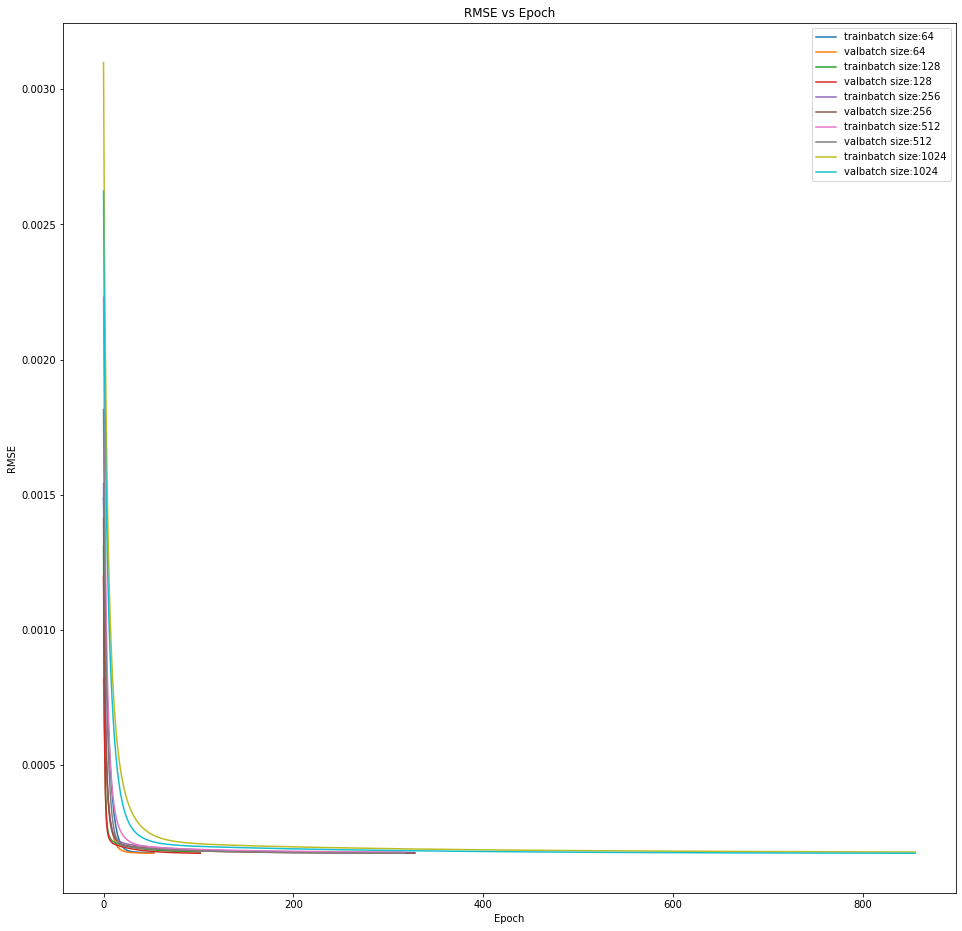

In [6]:
plt.figure(figsize=(16,16))
total_time = []

for batch_size in [64,128,256,512,1024]:
  w, rmse_train_array, rmse_val_array, epoch_time = mini_batch_GD(X_train,y_train,X_val,y_val,batch_size,0.01,1.001*rmse_val)
  total_time.append(epoch_time[-1])
  plt.plot(rmse_train_array,label='train'+'batch size:'+str(batch_size))
  plt.plot(rmse_val_array,label='val'+'batch size:'+str(batch_size))
  plt.xlabel("Epoch")
  plt.ylabel("RMSE")
  plt.title('RMSE vs Epoch')
  plt.legend()

plt.show()

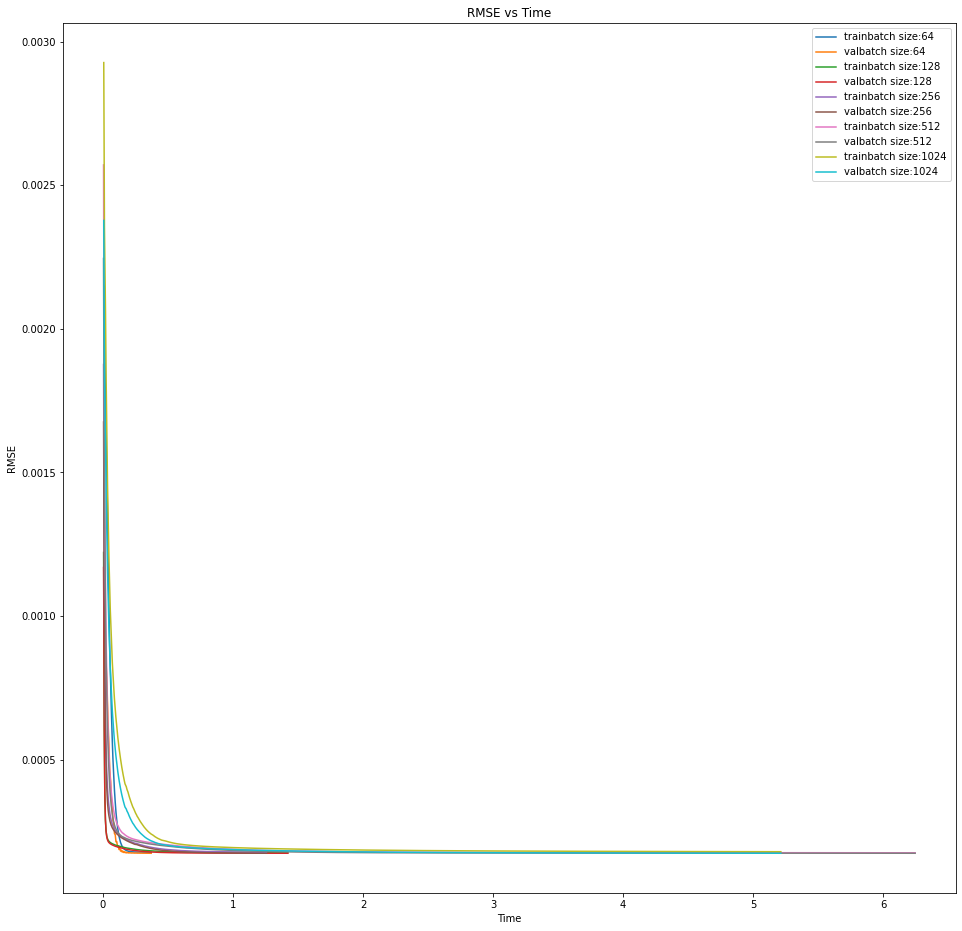

In [7]:
plt.figure(figsize=(16,16))


for batch_size in [64,128,256,512,1024]:
  w, rmse_train_array, rmse_val_array, epoch_time = mini_batch_GD(X_train,y_train,X_val,y_val,batch_size,0.01,1.001*rmse_val)
  plt.plot(epoch_time,rmse_train_array,label='train'+'batch size:'+str(batch_size))
  plt.plot(epoch_time,rmse_val_array,label='val'+'batch size:'+str(batch_size))
  plt.xlabel("Time")
  plt.ylabel("RMSE")
  plt.title('RMSE vs Time')
  plt.legend()

plt.show()

Text(0.5, 1.0, 'Total time vs batch size')

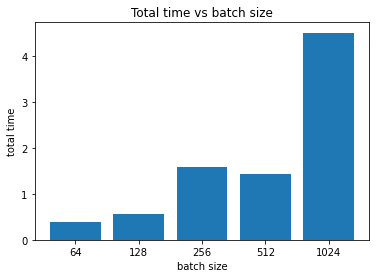

In [8]:
plt.figure()
plt.bar(['64','128','256','512','1024'],total_time)
plt.xlabel('batch size')
plt.ylabel('total time')
plt.title('Total time vs batch size')

## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

Momentum can reduce the time cost to converge. When the beta is small, the rmse curve is smooth and when beta is too large as 0.99, the rmse curve is fluctuating. Not all beta have good performance at improving efficiency and 0.1, 0.2, 0.3, 0.4, 0.99 can reduce the running time. That may be different in different runs.

In [9]:
def mini_batch_GD_momentum(X_train,y_train,X_val,y_val,batch_size,lr,CT,beta):
  count = 0
  w = 0.001*np.random.random(41)
  rmse_train_array = []
  rmse_val_array = []
  rmse_val = 1
  epoch_time = []
  start_time = time.time()
  last_gradient = np.array([0]*41)
  
  while rmse_val > CT:
    mini_batches = create_mini_batches(X_train,y_train,batch_size)
    
    for mini_batch in mini_batches:
      X, y = mini_batch
      pre_train = np.dot(X,w.T)
      gradient = beta * last_gradient + (1-beta) * (1/len(pre_train) * np.dot(X.T, pre_train-y))
      w = w - lr * gradient
      last_gradient = gradient
    
    pre_train = np.dot(X_train,w.T)
    pre_val = np.dot(X_val,w.T)
    rmse_train = mean_squared_error(pre_train,y_train,squared=False)
    rmse_val = mean_squared_error(pre_val,y_val,squared=False)
    
    #use the 'count' to count how many times rmse increses more than decreases
    if len(rmse_val_array) > 0 and rmse_val > rmse_val_array[-1]:
      count+=1
    elif count > 0:
      count-=1
    #use 100 as threshold
    if count > 100:
      raise ValueError('the batch size is not suitable')
    
    rmse_train_array.append(rmse_train)
    rmse_val_array.append(rmse_val)
    epoch_time.append(time.time() - start_time)

  return w, rmse_train_array, rmse_val_array, epoch_time

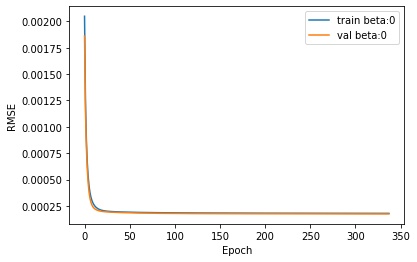

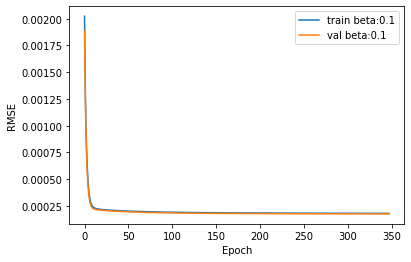

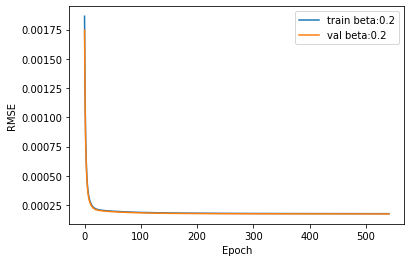

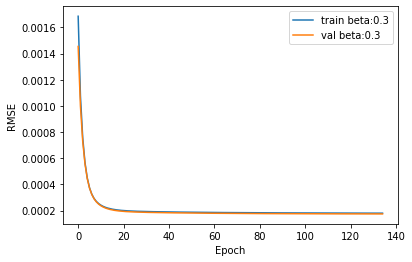

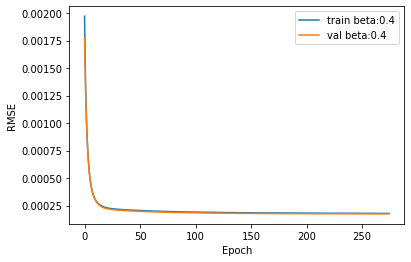

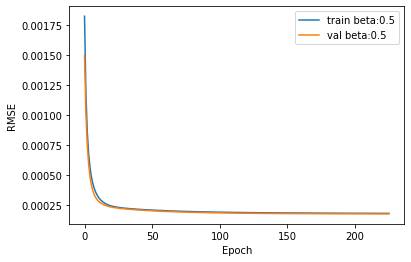

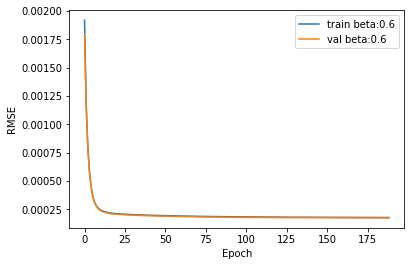

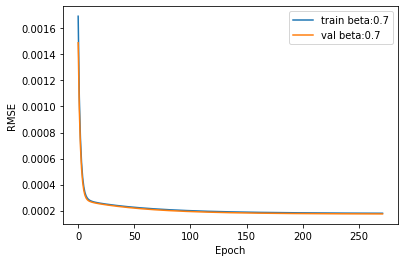

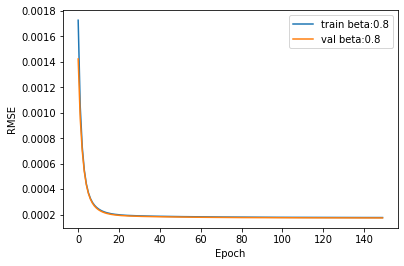

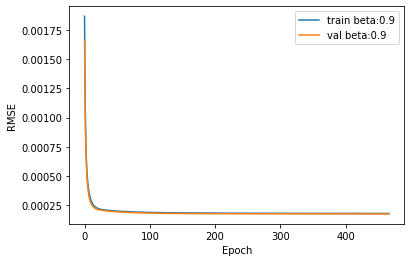

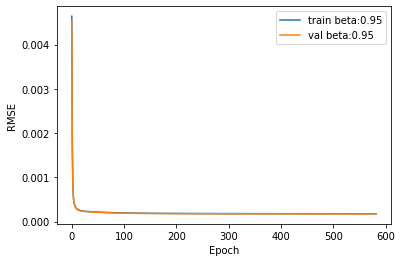

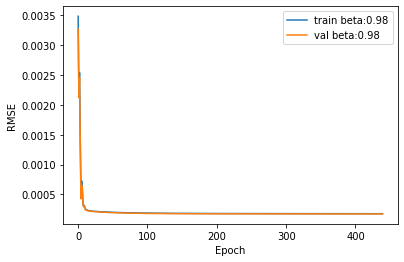

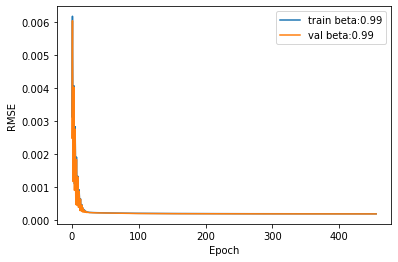

In [16]:
total_time_beta = []
for beta in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99]:
  w, rmse_train_array, rmse_val_array, epoch_time = mini_batch_GD_momentum(X_train,y_train,X_val,y_val,256,0.01,1.001*rmse_val,beta)
  total_time_beta.append(epoch_time[-1])
  plt.figure()
  plt.plot(rmse_train_array,label='train'+' beta:'+str(beta))
  plt.plot(rmse_val_array,label='val'+' beta:'+str(beta))
  plt.xlabel("Epoch")
  plt.ylabel("RMSE")
  plt.legend()

<BarContainer object of 13 artists>

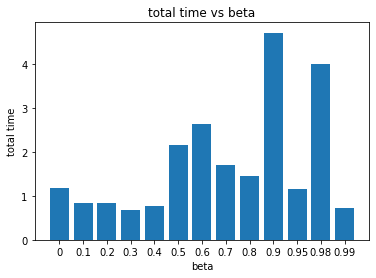

In [11]:
plt.figure()
plt.title('total time vs beta')
plt.xlabel('beta')
plt.ylabel('total time')
plt.bar(['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','0.95','0.98','0.99'],total_time_beta)

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

Final running time is about 1s and RMSE of the test data is 0.00017. The model has a good performance on the test data.

In [23]:
#choose mini-batch model and momentum
#256 as batch-size and 0.4 as beta, from the previous model we choose epoch as 200

  
w = 0.001*np.random.random(41)
rmse_test_array = []
epoch_time = []
start_time = time.time()
last_gradient = np.array([0]*41)
batch_size = 256
beta = 0.4

for epoch in range(200):
  mini_batches = create_mini_batches(X_train,y_train,batch_size)
  
  for mini_batch in mini_batches:
    X, y = mini_batch
    pre_train = np.dot(X,w.T)
    gradient = beta * last_gradient + (1-beta) * (1/len(pre_train) * np.dot(X.T, pre_train-y))
    w = w - lr * gradient
    last_gradient = gradient
  
  pre_train = np.dot(X_train,w.T)
  pre_test = np.dot(X_test,w.T)
  
  rmse_test = mean_squared_error(pre_test,y_test,squared=False)
  
  rmse_test_array.append(rmse_test)
  epoch_time.append(time.time() - start_time)

Text(0.5, 1.0, 'test RMSE vs epoch')

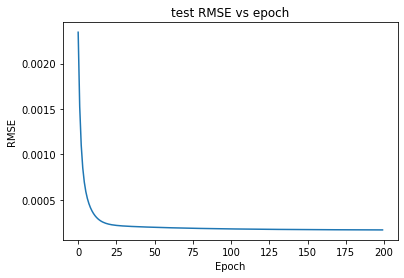

In [24]:
plt.figure()
plt.plot(rmse_test_array)
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title('test RMSE vs epoch')

In [25]:
print("test RMSE:",rmse_test_array[-1],"\ntest time:",epoch_time[-1])

test RMSE: 0.00017064131788139847 
test time: 0.9128820896148682
